  
import teradata
import pandas as pd
import matplotlib.pyplot as plt
host,user,pwd ='10.132.4.11','Dummy', "Dummy@123"
udaExec =teradata.UdaExec (appName="HelloWorld", version="1.0",logConsole=False)
with udaExec.connect(method="ODBC", system=host,username=user,password=pwd) as session:
    query1 = '''sel * FROM DD_RO_ADHOC.MERCHANT_RECOM_Rating'''#  sample 1000000
    Data = pd.read_sql(query1,session) 
Data.shape

In [ ]:
#Data.to_excel('C:\\Users\\tvimal\\Desktop\\MERCHANT_Data.xlsx')

In [2]:
#TRANSACTION DATA 
data=pd.read_excel('C:\\Users\\tvimal\\Desktop\\MERCHANT_Data.xlsx')
Data=data[['MASK_ID','MERCHANT_NAME','Score']]
Data.head()

,MASK_ID,MERCHANT_NAME,Score
0,11748807,LOH GUAN LYE SPECIALISTS PENANG,14.5
1,848666,COSWAY,12.5
2,13758153,CMSB,13.5
3,12875998,COSWAY,13.0
4,13630440,NEP,10.0


In [3]:
# NO OF MERCHANTS USED PER CUSTOMER
Count= Data.groupby('MASK_ID').agg({'MERCHANT_NAME': ', '.join})
Count['Merchant_count']=Count['MERCHANT_NAME'].apply(lambda x: len(str(x).split(",")))
Count.head()

,MERCHANT_NAME,Merchant_count
MASK_ID,,
4,"0 , PRUBSN...",2
44,"KNL MARKET , MNG ...",5
67,"H & M-SUNWAY VELOCITY , TANGS ...",9
71,"MPH BOOKSTORES , ICHIBA...",2
122,"ERAMAN , CITY C...",2


In [4]:
#PERCENTAGE OF CUSTOMERS
import numpy as np
mapp=Count.groupby('Merchant_count').count()#.hist()
mapp['%']=np.round(mapp['MERCHANT_NAME']/mapp['MERCHANT_NAME'].sum(),2)
mapp.head()

,MERCHANT_NAME,%
Merchant_count,,
1,83632,0.33
2,51265,0.20
3,33346,0.13
4,23003,0.09
5,16419,0.06


# LONG TAIL PLOT

#TO REMOVE THE MOST USED COMMON MERCHANTS AMONG THE CUSTOMERS

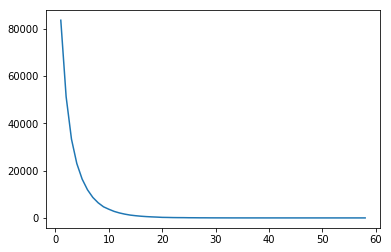

In [5]:
x=list(mapp.index)
y=list(mapp['MERCHANT_NAME'])
plt.plot(x,y)
plt.show()

In [6]:
len(Data.MASK_ID.unique())

254841

In [7]:
import numpy as np
User_id=pd.DataFrame(Data.MASK_ID.unique()).rename(columns={0:'MASK_ID'})
User_id['User_Num'] = np.random.choice(254841, User_id.shape[0],replace=False)
User_id.head()

,MASK_ID,User_Num
0,11748807,63196
1,848666,176584
2,13758153,53343
3,12875998,34830
4,13630440,95333


In [8]:
len(Data.MERCHANT_NAME.unique())

1017

In [9]:
Merchant_Id=pd.DataFrame(Data.MERCHANT_NAME.unique()).rename(columns={0:'MERCHANT_NAME'})
Merchant_Id['Mer_Id'] = np.random.choice(1017, Merchant_Id.shape[0],replace=False)
Merchant_Id.head()

,MERCHANT_NAME,Mer_Id
0,LOH GUAN LYE SPECIALISTS PENANG,403
1,COSWAY,725
2,CMSB,898
3,NEP,999
4,KITSCHEN,552


In [10]:
Rating = pd.merge(Data, User_id[['MASK_ID','User_Num']], on='MASK_ID', how='left') 
Rating_D = pd.merge(Rating, Merchant_Id[['MERCHANT_NAME','Mer_Id']], on='MERCHANT_NAME', how='left') 
Rating_data=Rating_D[['MASK_ID','User_Num','Mer_Id','Score']]
Rating_data.head(10)

,MASK_ID,User_Num,Mer_Id,Score
0,11748807,63196,403,14.5
1,848666,176584,725,12.5
2,13758153,53343,898,13.5
3,12875998,34830,725,13.0
4,13630440,95333,999,10.0
5,3923005,232690,552,12.0
6,2062899,88187,598,12.0
7,60496,211286,974,14.0
8,1173011,70607,297,13.0
9,3742721,238248,849,13.5


In [11]:
n_users = Rating_data.User_Num.unique().shape[0]
n_items = Rating_data.Mer_Id.unique().shape[0]
n_users
#n_items 

254841

In [ ]:
## import numpy as np
Data_matrix = np.zeros((n_users, n_items))
for line in Rating_data.itertuples():
    Data_matrix[line[2]-1, line[3]-1] = line[4]
Data_matrix

# ITEM BASED COLLABARATIVE FILTERING

In [13]:
from sklearn.metrics.pairwise import pairwise_distances 
item_similarity = pairwise_distances(Data_matrix.T, metric='cosine')
#user_similarity = pairwise_distances(Data_matrix, metric='cosine')
pd.DataFrame(item_similarity).head()

,0,1,2,3,4,5,6,7,8,9,...,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016
0,0.000000,0.994910,0.995824,0.987195,0.998913,0.996598,0.997040,0.998551,0.985154,0.992990,...,1.000000,0.996589,0.998074,0.994894,0.997444,0.998057,0.996519,0.997038,0.996256,0.995110
1,0.994910,0.000000,0.997674,0.997163,1.000000,0.997777,0.995071,0.998427,0.991035,1.000000,...,0.993082,0.994020,1.000000,0.996673,1.000000,0.913525,1.000000,0.998251,0.997401,0.997373
2,0.995824,0.997674,0.000000,0.994731,0.998758,0.991855,0.997504,1.000000,0.971278,0.993888,...,1.000000,0.986055,1.000000,0.991144,0.998022,1.000000,0.997309,0.987111,1.000000,0.985304
3,0.987195,0.997163,0.994731,0.000000,0.994010,0.982991,0.993967,0.984170,0.960066,0.990696,...,0.993823,0.986138,0.998383,0.986690,0.999379,0.999133,0.996829,0.992089,0.992240,0.986547
4,0.998913,1.000000,0.998758,0.994010,0.000000,1.000000,0.996562,0.993700,0.987426,0.997954,...,1.000000,1.000000,0.998565,0.998365,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
def predict(Rating_data, similarity, type='user'):
    if type == 'user':
        mean_user_rating = Rating_data.mean(axis=1)
        #We use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (Rating_data - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = Rating_data.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [15]:
#user_prediction = predict(data_matrix, user_similarity, type='user')
Item_prediction = predict(Data_matrix, item_similarity, type='item')

In [ ]:
print(pd.DataFrame(Item_prediction).shape)
Item_based=pd.DataFrame(Item_prediction)
Item_based

In [18]:
f_data=Item_based.set_index(Rating_data.MASK_ID.unique())
f_data.head()

,0,1,2,3,4,5,6,7,8,9,...,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016
11748807,0.033378,0.033509,0.033474,0.033407,0.033373,0.033452,0.033459,0.033373,0.033302,0.033331,...,0.033438,0.033505,0.033483,0.033396,0.033496,0.033480,0.033516,0.033505,0.033378,0.033365
848666,0.025517,0.025602,0.025575,0.025601,0.025441,0.025673,0.025563,0.025649,0.025589,0.025526,...,0.025570,0.025629,0.025544,0.025622,0.025585,0.025570,0.025501,0.025681,0.025587,0.025568
13758153,0.162707,0.163169,0.162024,0.161116,0.163159,0.160167,0.162511,0.162731,0.158895,0.162895,...,0.163292,0.162576,0.163250,0.162610,0.163058,0.163290,0.162842,0.161524,0.163075,0.161910
12875998,0.025340,0.025471,0.025485,0.024874,0.025569,0.025417,0.025376,0.025408,0.024792,0.025487,...,0.025548,0.025429,0.025524,0.025401,0.025552,0.025491,0.025142,0.025247,0.025354,0.025283
13630440,0.099093,0.099387,0.099236,0.098946,0.099483,0.099258,0.099129,0.099446,0.098204,0.099318,...,0.099385,0.099243,0.099306,0.099128,0.099386,0.099350,0.098067,0.099184,0.099433,0.099158


In [ ]:
new_col=list(Merchant_Id['MERCHANT_NAME'])
f_data.rename(columns=dict(zip(f_data.columns, new_col)),inplace=True)
f_data

In [ ]:
data1=f_data.iloc[:100000,:]
data2=f_data.iloc[100001:,:]
D1=pd.DataFrame(data1.columns[np.argsort(-data1.values, axis=1)], index=data1.index).reset_index()
D2=pd.DataFrame(data2.columns[np.argsort(-data2.values, axis=1)], index=data2.index).reset_index()
Rec_merchants=pd.concat([D1.iloc[:,:30],D2.iloc[:,:30]],axis=0)
Rec_merchants

In [30]:
Recomended_Mer=Rec_merchants.iloc[:,:5]
Recomended_Mer=Recomended_Mer.rename(columns={'index':'MASK_ID'})
Recomended_Mer.head()

,MASK_ID,0,1,2,3
0,11748807,VERN,SYARIKAT TAKAFUL M,ASSUNTA HOSPITAL,PB CARE PA
1,848666,CTX RO MOSAT MGMT,JAYA GROCER KIARA,CTX RO TONG LEE,GEGM BHD KL
2,13758153,DIN TAI FUNG,BILLION SHOPPING CENTR,TOYOTA SERVICE,CYCLE
3,12875998,TRIUMPH,MIRRORCLE,PATHLAB HEALTH MANAGE,COURTS
4,13630440,LAVENDER CNFCT,CTX PP TEIK SANG,DBKL,GBSN


# MERCHANT Evaluation

In [32]:
Recomended_Mer['MASK_ID']=Recomended_Mer['MASK_ID'].astype(int)
Rec_obj = Recomended_Mer.select_dtypes(['object'])
Recomended_Mer[Rec_obj.columns] = Rec_obj.apply(lambda x: x.str.strip())
Recomended_Mer.head()

,MASK_ID,0,1,2,3
0,11748807,VERN,SYARIKAT TAKAFUL M,ASSUNTA HOSPITAL,PB CARE PA
1,848666,CTX RO MOSAT MGMT,JAYA GROCER KIARA,CTX RO TONG LEE,GEGM BHD KL
2,13758153,DIN TAI FUNG,BILLION SHOPPING CENTR,TOYOTA SERVICE,CYCLE
3,12875998,TRIUMPH,MIRRORCLE,PATHLAB HEALTH MANAGE,COURTS
4,13630440,LAVENDER CNFCT,CTX PP TEIK SANG,DBKL,GBSN


In [35]:
result = pd.merge(Recomended_Mer,Count, on='MASK_ID', how='left') 
result=result.rename(columns={0:'Rec_Mer1',1:'Rec_Mer2',2:'Rec_Mer3','MERCHANT_NAME':'Used_Merchants'})
Result=result[['MASK_ID', 'Used_Merchants', 'Rec_Mer1' ,'Rec_Mer2' ,'Rec_Mer3']]
Result.head(10)

,MASK_ID,Used_Merchants,Rec_Mer1,Rec_Mer2,Rec_Mer3
0,11748807,"LOH GUAN LYE SPECIALISTS PENANG , ISLAND...",VERN,SYARIKAT TAKAFUL M,ASSUNTA HOSPITAL
1,848666,COSWAY,CTX RO MOSAT MGMT,JAYA GROCER KIARA,CTX RO TONG LEE
2,13758153,CMSB,DIN TAI FUNG,BILLION SHOPPING CENTR,TOYOTA SERVICE
3,12875998,"COSWAY , AMWAY ...",TRIUMPH,MIRRORCLE,PATHLAB HEALTH MANAGE
4,13630440,"NEP , NEP DI...",LAVENDER CNFCT,CTX PP TEIK SANG,DBKL
5,3923005,KITSCHEN,KK SUPERMART,TELEKOM MALAYSIA BERHA,SKECHER
6,2062899,NIRWANA MAJU,ORIENTAL PAVILION,AMG,CTX CO CAA
7,60496,"ORIGIN , TMB ...",KK SUPERMART,ORIENTAL PAVILION,CHARLES
8,1173011,MPY,KK SUPERMART,ORIENTAL PAVILION,PENANG SWIMMING CLUB
9,3742721,"LULU SUPERMARKET , COWAY ...",FISH,PARKWELL,EXTRA EXCEL


In [36]:
#Data['Mer']=[ i.rstrip() for i in Data['MERCHANT_NAME']]
#dfs= Data.groupby('ID').agg({'Mer': ', '.join}).reset_index()

In [37]:
Result.to_excel('C:\\Users\\tvimal\\Desktop\\GEO_LOCATION_MODEL\\Recommended_Merchants_data.xlsx')